In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import math
from astropy.table import Table
from scipy import stats

In [2]:
swift = Table.read("4U1700-377.orbit.lc.fits")

In [3]:
swift_df = np.array(swift)
swift_pd = pd.DataFrame(swift_df)

In [4]:
swift_pd

,TIME,RATE,ERROR,YEAR,DAY,MJD,TIMEDEL,STAT_ERR,SYS_ERR,PCODEFR,DATA_FLAG,DITHER_FLAG
0,130117312.0,0.034542,0.002474,2005,45,53415,1088.0,0.001724,0.001589,0.992188,0,1
1,130118456.0,0.015544,0.002705,2005,46,53416,576.0,0.002372,0.000715,0.843750,0,1
2,130123344.0,0.040667,0.002488,2005,46,53416,1472.0,0.001492,0.001871,0.843750,0,1
3,130130120.0,0.061358,0.004051,2005,46,53416,512.0,0.002641,0.002822,0.835938,0,0
4,130135976.0,0.089608,0.005340,2005,46,53416,384.0,0.003086,0.004122,0.835938,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
83102,766778128.0,0.030037,0.006038,2025,109,60784,768.0,0.005234,0.001382,1.015625,0,0
83103,766778960.0,0.009826,0.006417,2025,109,60784,640.0,0.005700,0.000452,1.000000,0,0
83104,766789480.0,0.024323,0.005513,2025,109,60784,824.0,0.004807,0.001119,1.015625,0,0
83105,766817192.0,0.049436,0.019000,2025,110,60785,600.0,0.016798,0.002274,0.238281,0,0


In [5]:
xmm_eclref_swifttime = 557162834.502 ## units of seconds since swift launch



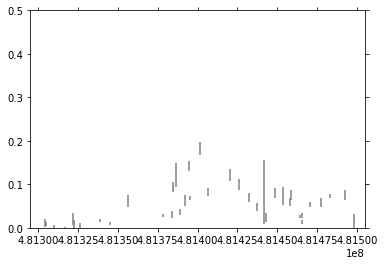

In [6]:
norbs = 10

reftime = 478357343.886 + 3.411660*86400*norbs

fig, ax = plt.subplots()

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


ax.errorbar(swift_df["TIME"], swift_df["RATE"], yerr=swift_df["ERROR"], 
             color='k', capthick=2, capsize=0, markersize=1, linestyle='none',
           ecolor='tab:grey')

ax.set_xlim([reftime - 10000, reftime + 200000])
ax.set_ylim([0, 0.5])

plt.show()

# Plot phase-folded

In [7]:
## Convert Swift times to phi:

#################################################################
#### Do not change anything in here unless well informed
## Orbital ephemeris from Islam and Paul 2016
orb_epoch = 49149.412 ## units MJD
Porb_0 = 3.411660 ## unit days D
Porb_rch = -4.7E-7 ## unit yrs^-1
Porb_rch *= 1/365.242374 ## units D^-1
#################################################################

obs_start_MJD = 57448.43129630


time_since_epoch = obs_start_MJD - orb_epoch

Porb_current = Porb_0 + (time_since_epoch*Porb_rch)


orbs_since_epoch = math.floor(time_since_epoch/Porb_current)
## print(f'orbs since epoch = {orbs_since_epoch}')

t_last_orb = orb_epoch + Porb_current*orbs_since_epoch
## print(f'time of last eclipse = {t_last_orb}')

orb_phase_start = (obs_start_MJD - t_last_orb)/Porb_current

# orb_phase_end = (obs_end_MJD - t_last_orb)/Porb_current


print(f'Obs start date {obs_start_MJD} (MJD)')
print(f'Last eclipse {t_last_orb}')
print(f'Current orbital period {Porb_current}')
print(f'Obs starts at orbital phase {orb_phase_start}')


Obs start date 57448.4312963 (MJD)
Last eclipse 57446.54314790122
Current orbital period 3.411649320683067
Obs starts at orbital phase 0.5534415238201649


In [8]:
def get_phi(time):
    deltime = time - 130117312.0 ## seconds since first Swift/BAT datapoint
    deltime_days = deltime / 86400 ## julian days since first SwiftBAT datapoint
    dp_day = 53415.98741444 + deltime_days ## observation on date
    
    time_since_epoch = dp_day - orb_epoch 
    Porb_current = Porb_0 + (time_since_epoch*Porb_rch)
    orbs_since_epoch = math.floor(time_since_epoch/Porb_current)
    t_last_orb = orb_epoch + Porb_current*orbs_since_epoch
    dp_phase = (dp_day - t_last_orb)/Porb_current
    return dp_phase

In [9]:
swift_pd["PHI"] = swift_pd["TIME"].apply(get_phi)

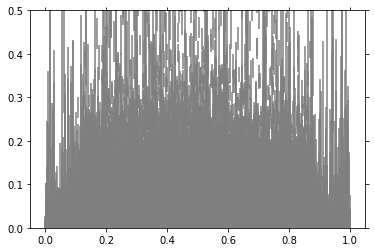

In [10]:
fig, ax = plt.subplots()

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


ax.errorbar(swift_pd["PHI"], swift_pd["RATE"], yerr=swift_pd["ERROR"], 
             color='k', capthick=2, capsize=0, markersize=5, linestyle='none',
           ecolor='tab:grey')

ax.set_ylim([0, 0.5])

plt.show()

In [11]:
## Histogram

bin_means, bin_edges, binnumber = stats.binned_statistic(x=swift_pd["PHI"], values=swift_pd["RATE"], 
                                                         statistic="mean", bins=1000, range=(0,1))

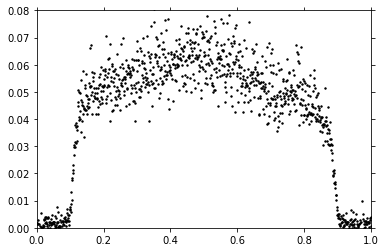

In [12]:
fig, ax = plt.subplots()

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


ax.scatter(bin_edges[:-1], bin_means, color='k', s=2)

ax.set_ylim([0, 0.08])
ax.set_xlim([0,1])

plt.show()